In [307]:
#####################################################################################################
######################### ECOMMERCE DATA SET  #####################################################
#####################################################################################################


In [308]:
##########################################################################
############### Part I - Importing 
##########################################################################


import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
df = pd.read_csv('Ecommerce Customers.csv')

In [310]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [311]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [312]:
df[df.duplicated()]                                #### no duplicates

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [313]:
####################################################################
############## Part III - Missing Values
####################################################################


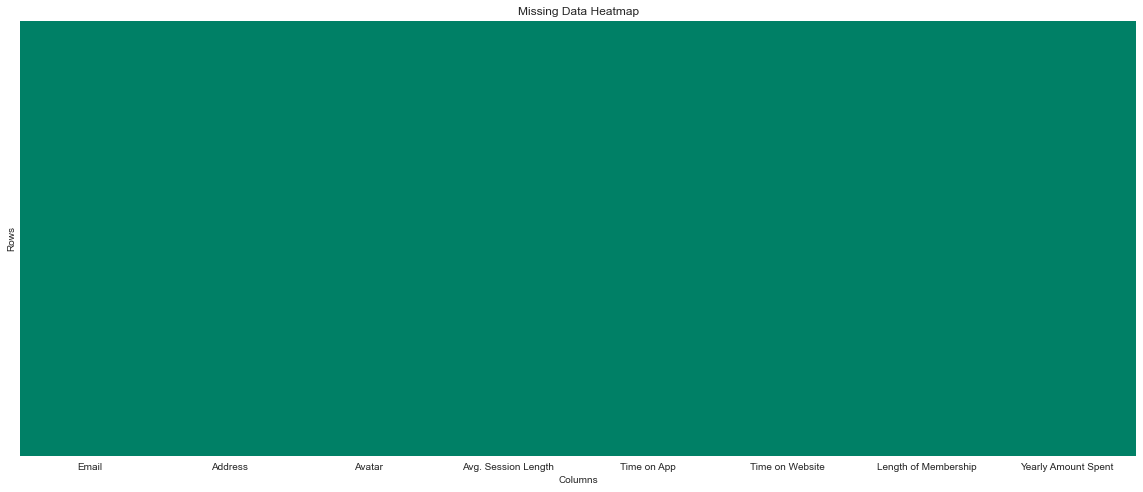

In [314]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### seems like a clean data

In [315]:
df.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [317]:
######################################################################
############## Part IV - Feature Engineering
######################################################################


In [318]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [319]:
x = df.Email[0]

x

'mstephenson@fernandez.com'

In [320]:
x.split('@')[1]

'fernandez.com'

In [321]:
df['Domain'] = df.Email.apply(lambda x:x.split('@')[1])     

In [322]:
df.head()                      #### made a new column Domain to just see the domain

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com


In [323]:
df.Domain.value_counts()                #### most popular one is gmail and hotmail followed by yahoo

gmail.com              87
hotmail.com            87
yahoo.com              76
jackson.com             2
barber.com              2
                       ..
salinas.biz             1
carson-hansen.com       1
scott.com               1
bennett-branch.info     1
davidson.com            1
Name: Domain, Length: 244, dtype: int64

In [324]:
df['Cities'] = df.Address.apply(lambda x:x.split()[-2])

In [325]:
df.rename(columns={'Cities':'State'},inplace=True)

In [326]:
df.head()                                 #### now we have all the states

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain,State
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [327]:
df.State.value_counts()                    #### now we have the states of customers

AE    18
AA    17
DE    13
SC    13
MO    13
      ..
OH     5
TN     5
CT     5
WA     4
ID     3
Name: State, Length: 62, dtype: int64

In [328]:
new_df = df.copy()

In [329]:
new_df.head()                        #### its always better and safer to work on the copy then the real df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain,State
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [330]:
new_df.drop(columns=['Email','Address','Avatar'],inplace=True)           #### dropping two columns because we have stripped the important thing from it

In [331]:
new_df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain,State
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [332]:
new_df.rename(columns={'Avg. Session Length':'Avg_session_Len',
                        'Time on App':'App_time',
                        'Time on Website':'Website_time',
                        'Length of Membership':'Membership_len',
                        'Yearly Amount Spent':'Spent_anually'},inplace=True)

In [333]:
new_df.head()                  #### renamed the columns for easy calls

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [334]:
new_df.Membership_len.round()

0      4.0
1      3.0
2      4.0
3      3.0
4      4.0
      ... 
495    4.0
496    4.0
497    5.0
498    2.0
499    3.0
Name: Membership_len, Length: 500, dtype: float64

In [335]:
new_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [336]:
new_df['Member'] = new_df.Membership_len.round()              #### keeping membership float doesn't makes sense here so for now we make a new col to round it off

In [337]:
new_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,4.0
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,3.0
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,4.0
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,3.0
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,4.0


In [338]:
######################################################################
############## Part V - EDA
######################################################################


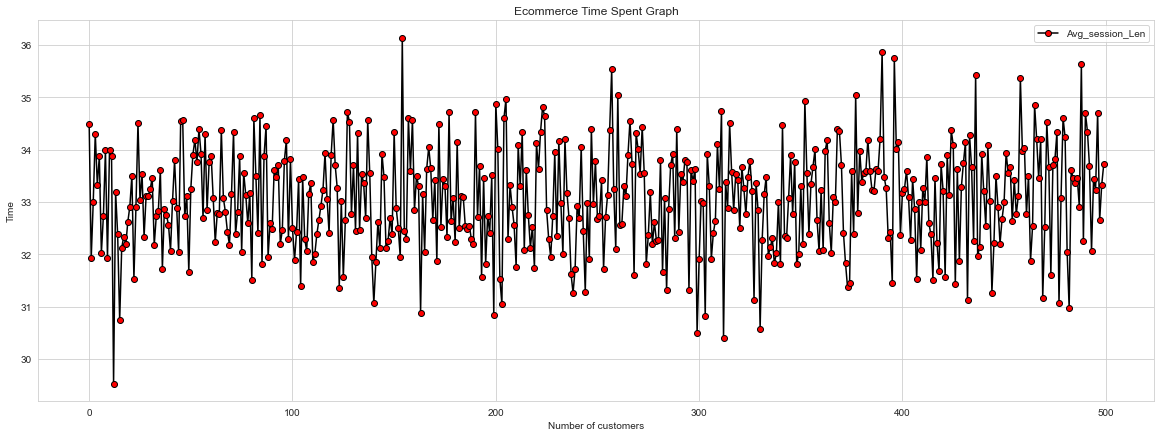

In [339]:
new_df['Avg_session_Len'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Ecommerce Time Spent Graph')

plt.xlabel('Number of customers')

plt.ylabel('Time')


#### seems like the avg is around 33 

In [340]:
new_df.Avg_session_Len.mean()

33.053193518196196

In [341]:
new_df.Avg_session_Len.std()                #### seems pretty good nothing suspecious

0.9925631110845354

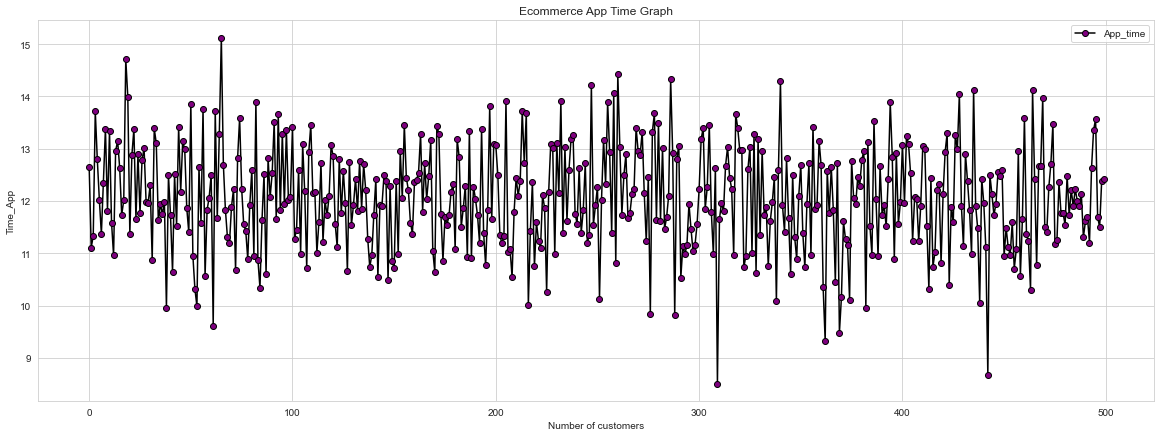

In [342]:
new_df['App_time'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='purple',color='black')

plt.title('Ecommerce App Time Graph')

plt.xlabel('Number of customers')

plt.ylabel('Time_App')


#### mean of the time on app is around 12

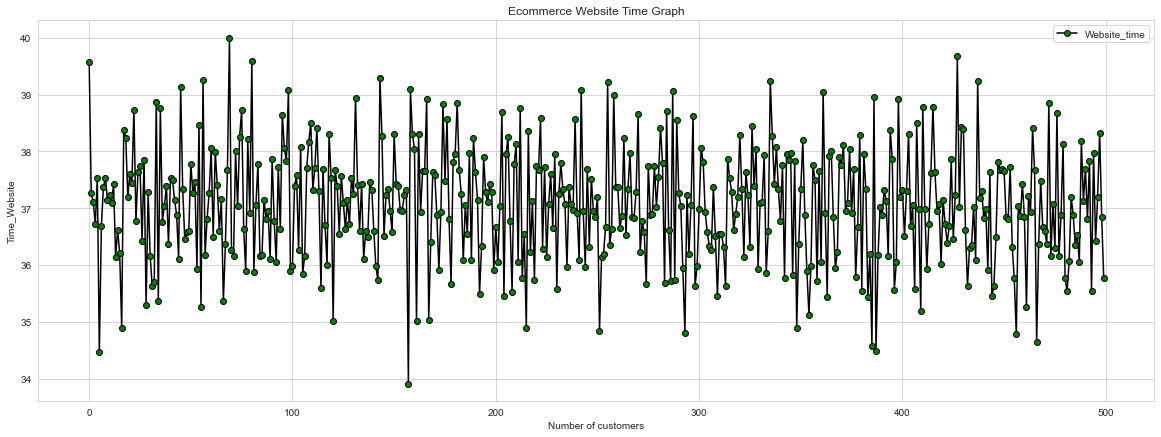

In [343]:
new_df['Website_time'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='black')

plt.title('Ecommerce Website Time Graph')

plt.xlabel('Number of customers')

plt.ylabel('Time_Website')


#### seems like from this info most of the people prefer the website then compared to app

In [344]:
new_df.Website_time.mean()

37.06044542094859

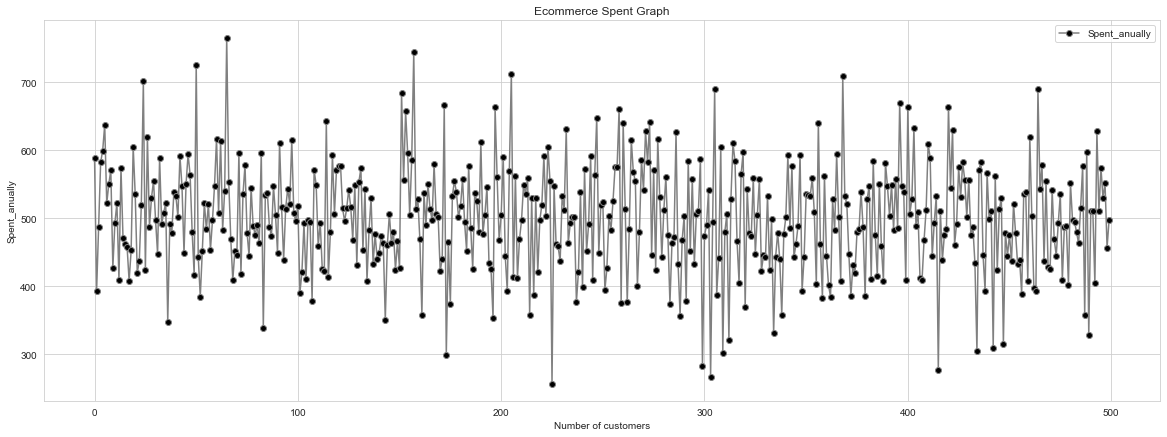

In [345]:
new_df['Spent_anually'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='grey')

plt.title('Ecommerce Spent Graph')

plt.xlabel('Number of customers')

plt.ylabel('Spent_anually')


#### seems like the mean is around 500 spent annually

In [346]:
new_df.Spent_anually.mean()              #### we were right about it

499.314038258591

In [347]:
new_df.Spent_anually.std()               #### std seems a bit more on the higher side

79.31478154970677

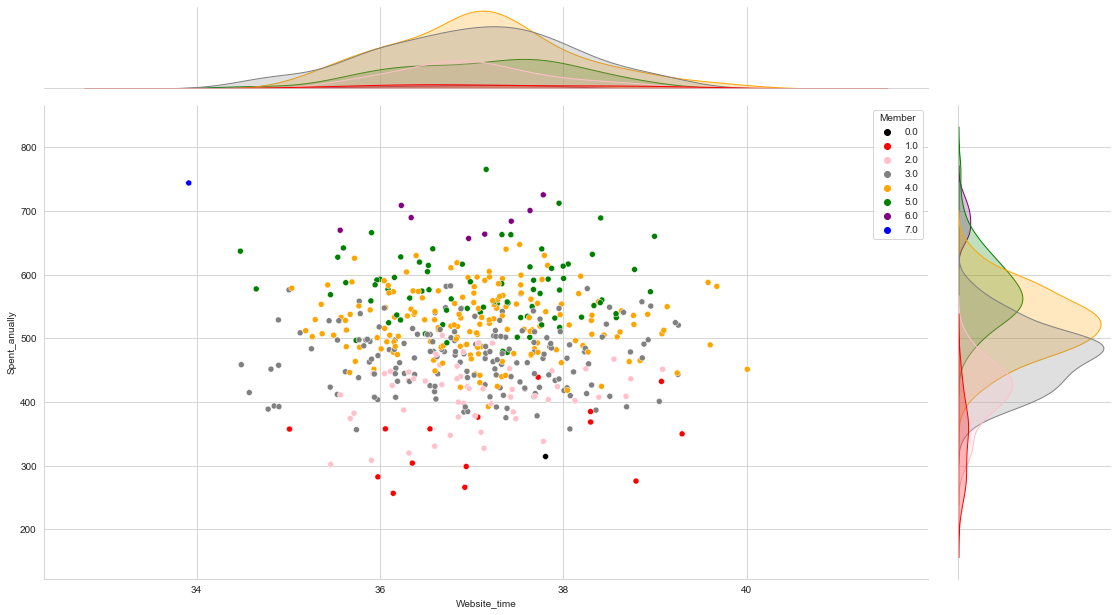

In [348]:
custom = {0:'black',
         1:'red',
         2:'pink',
         3:'grey',
         4:'orange',
         5:'green',
         6:'purple',
         7:'blue'}

g = sns.jointplot(x=new_df.Website_time,y=new_df.Spent_anually,data=new_df,hue='Member',palette=custom)

g.fig.set_size_inches(17,9)


#### clearly we see a peak in website time usage from members 3-4 years
#### also we see a peak in money spent from members of 3 and 4 years, interesting



In [349]:
new_df.Member.unique()

array([4., 3., 5., 2., 6., 1., 7., 0.])

In [350]:
new_df.Member.value_counts()                #### seems like we have the most from 4 and 3 years plus members so it makes sense the time and spending is higher from those group

4.0    173
3.0    169
5.0     77
2.0     56
1.0     15
6.0      8
7.0      1
0.0      1
Name: Member, dtype: int64

In [351]:
new_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,4.0
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,3.0
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,4.0
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,3.0
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,4.0


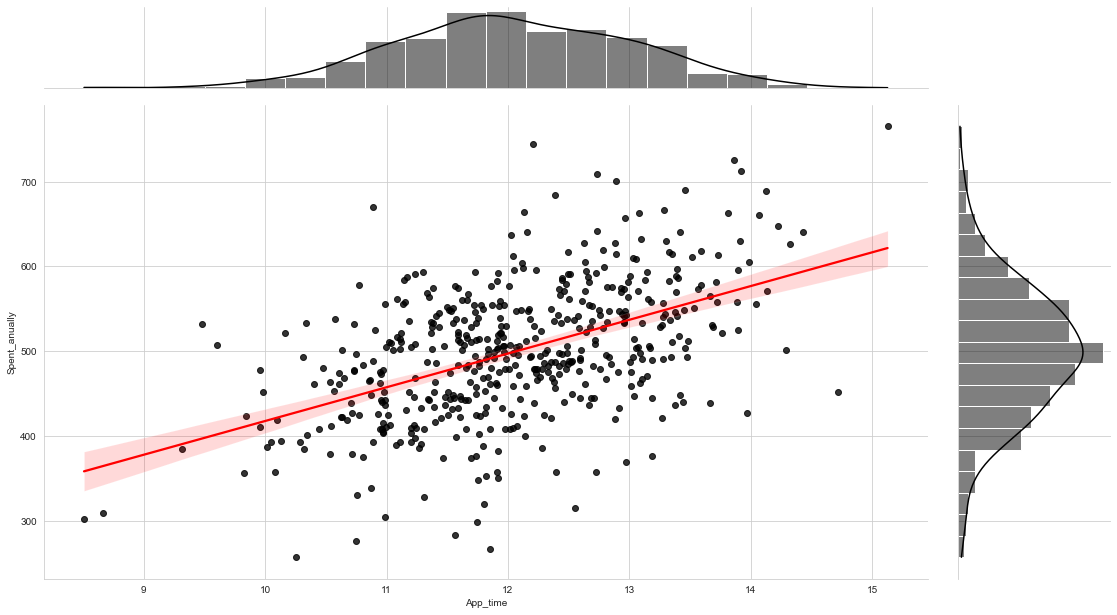

In [352]:
g = sns.jointplot(x='App_time',y='Spent_anually',data=new_df,kind='reg',color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)


#### seems pretty linear to me which obviously is not suprising

In [353]:
from scipy.stats import pearsonr


In [354]:
co_eff, p_value = pearsonr(new_df.App_time,new_df.Spent_anually)

In [355]:
co_eff                                    #### we were right they are strongly correlated

0.4993277700534504

In [356]:
p_value                                   #### we can accept the alternative hypothesis

6.905842369971329e-33

In [357]:
corr = new_df.corr()

In [358]:
corr

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Member
Avg_session_Len,1.000000,-0.027826,-0.034987,0.060247,0.355088,0.051720
App_time,-0.027826,1.000000,0.082388,0.029143,0.499328,0.017263
Website_time,-0.034987,0.082388,1.000000,-0.047582,-0.002641,-0.010260
Membership_len,0.060247,0.029143,-0.047582,1.000000,0.809084,0.962390
Spent_anually,0.355088,0.499328,-0.002641,0.809084,1.000000,0.771089
Member,0.051720,0.017263,-0.010260,0.962390,0.771089,1.000000


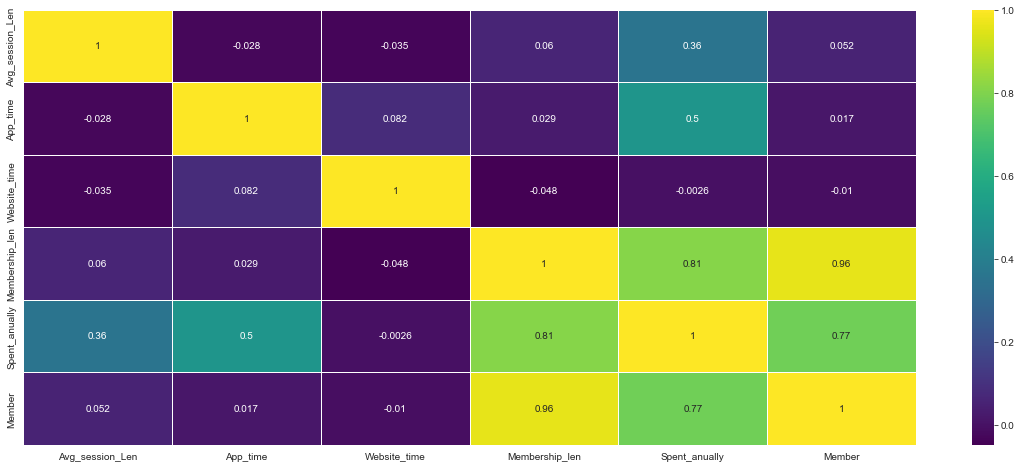

In [359]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### something strange we see from here, website time is not correlated to money spend

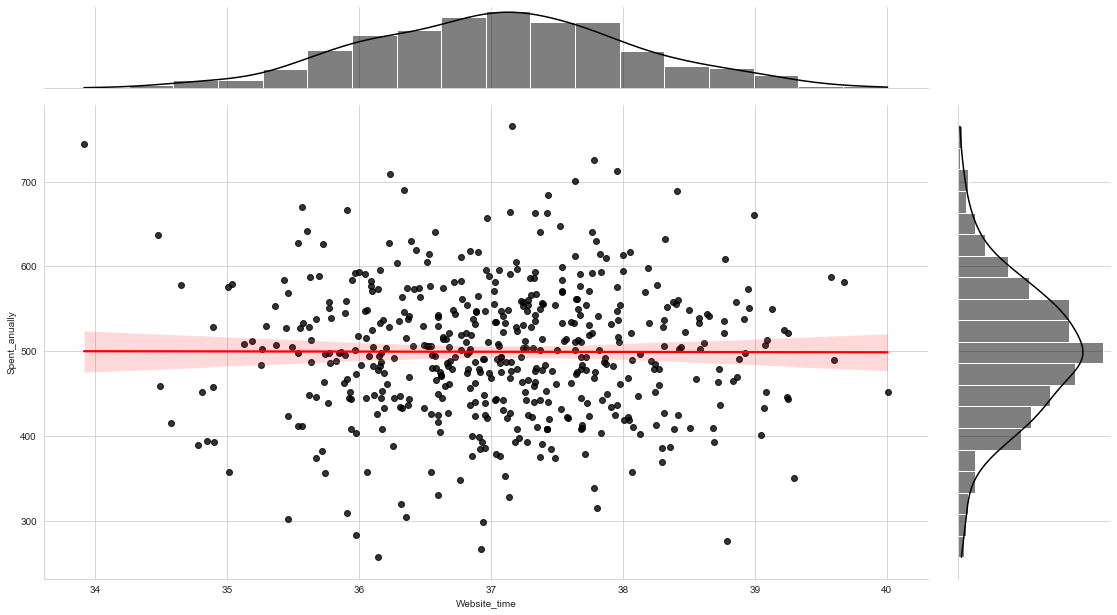

In [360]:
g = sns.jointplot(x='Website_time',y='Spent_anually',data=new_df,kind='reg',color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)


#### no wonder this is not correlated

In [361]:
co_eff, p_value = pearsonr(new_df.Website_time,new_df.Spent_anually)

In [362]:
co_eff                         #### very suprised because initially i had thought they must be correlated but here we see its not the case

-0.00264084467215892

In [363]:
p_value                        #### null hypothesis accepted

0.9530290603515617

In [364]:
state_df = new_df.groupby('State').sum()

state_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Member
State,,,,,,
AA,560.676457,209.622937,633.521267,56.248283,8404.696987,57.0
AE,594.467651,218.279702,667.564774,59.030000,8686.830269,58.0
AK,232.862689,79.600961,259.615616,24.600021,3340.081851,25.0
AL,299.332420,105.580755,331.699073,34.842967,4590.039942,36.0
AP,365.565320,131.440787,407.155549,41.203725,5601.876470,43.0


In [365]:
from sklearn.preprocessing import StandardScaler


In [366]:
scaler = StandardScaler()                          #### we will standardize state df


In [367]:
standardized_df = scaler.fit_transform(state_df)

In [368]:
df_comp = pd.DataFrame(standardized_df,columns=['Avg_session_Len', 'App_time', 'Website_time', 'Membership_len','Spent_anually', 'Member'])

In [369]:
df_comp.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Member
0,3.081622,3.241350,3.123632,2.623175,3.016520,2.696953
1,3.435668,3.490934,3.441399,2.886103,3.210916,2.791529
2,-0.353042,-0.507327,-0.366448,-0.368215,-0.473113,-0.329492
3,0.343393,0.241699,0.306388,0.599947,0.388136,0.710848
4,1.037348,0.987272,1.010708,1.201165,1.085314,1.372883


In [370]:
df_comp.index = state_df.index                    #### we want the index from state df

In [371]:
df_comp.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Member
State,,,,,,
AA,3.081622,3.241350,3.123632,2.623175,3.016520,2.696953
AE,3.435668,3.490934,3.441399,2.886103,3.210916,2.791529
AK,-0.353042,-0.507327,-0.366448,-0.368215,-0.473113,-0.329492
AL,0.343393,0.241699,0.306388,0.599947,0.388136,0.710848
AP,1.037348,0.987272,1.010708,1.201165,1.085314,1.372883


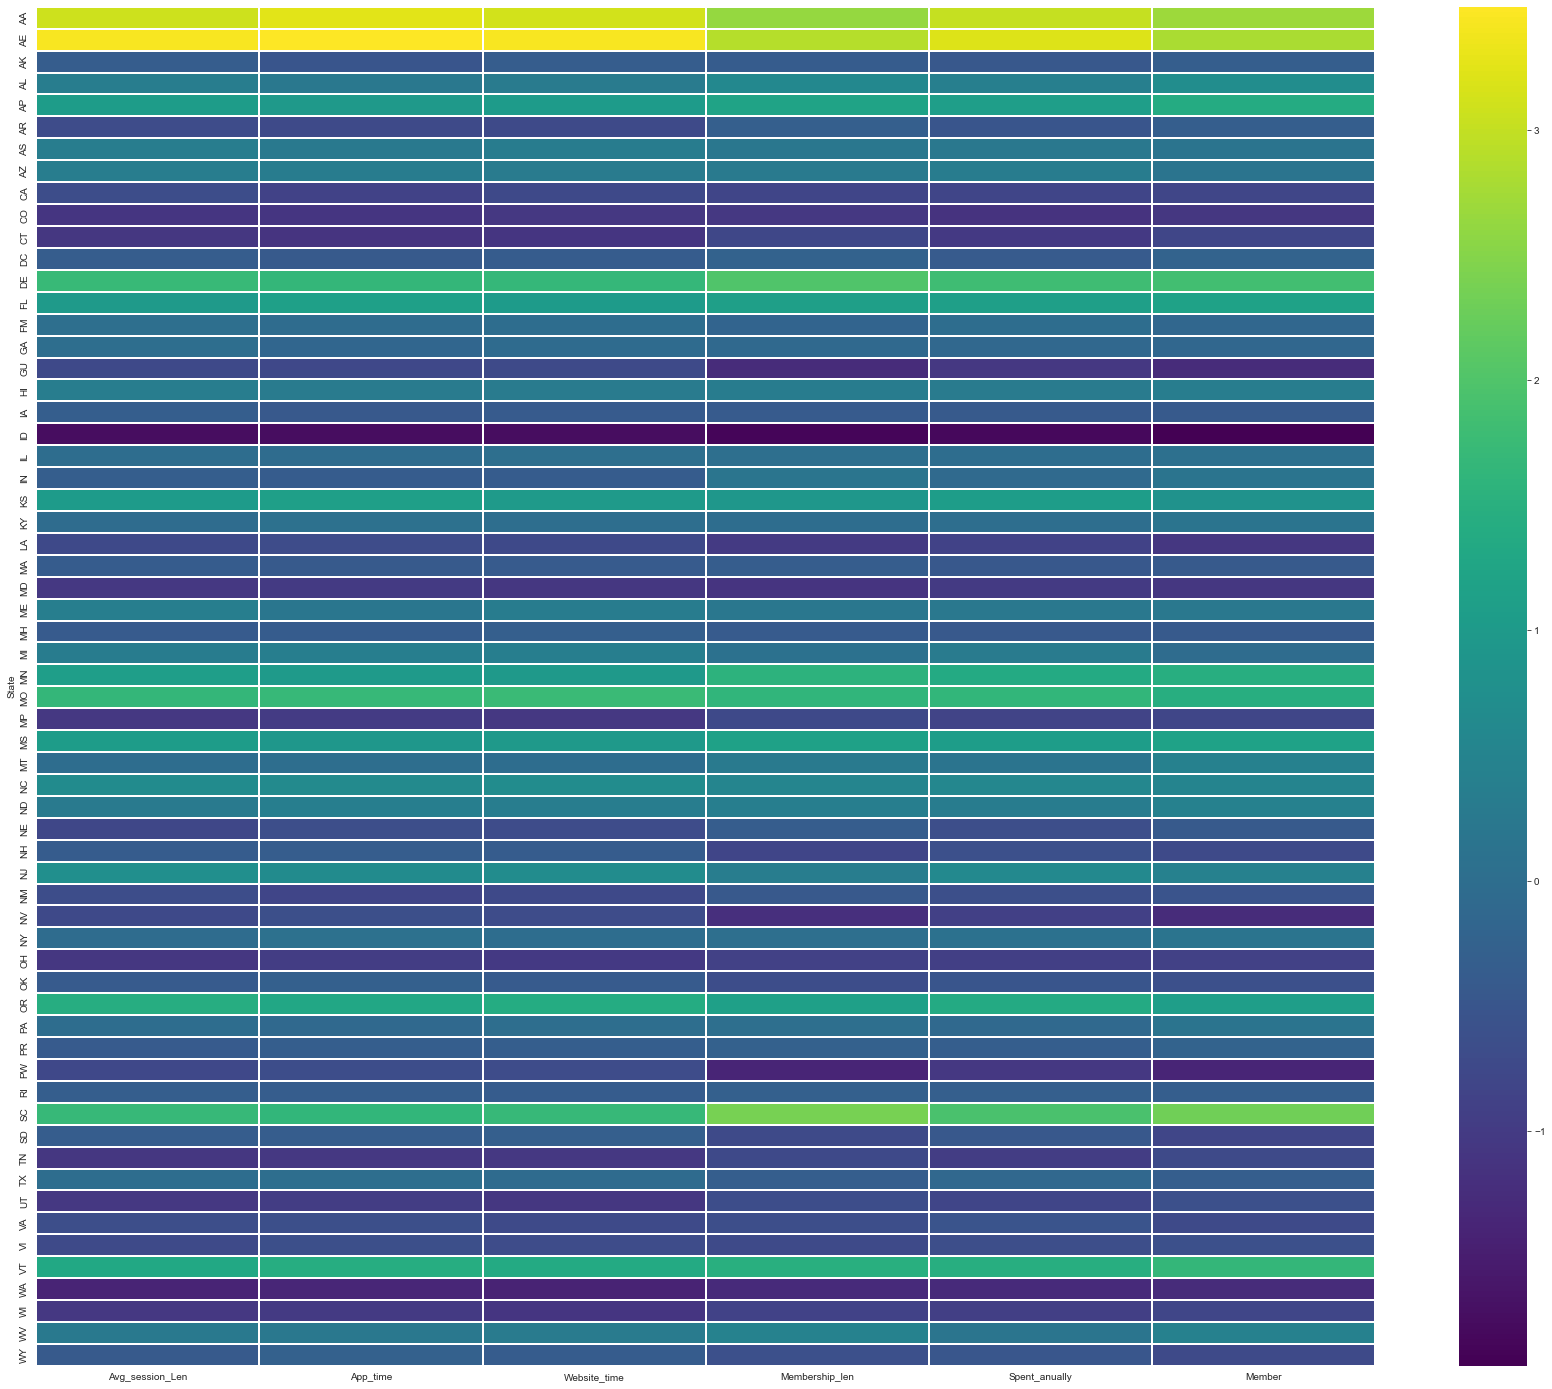

In [372]:
fig, ax = plt.subplots(figsize=(30,25)) 

sns.heatmap(df_comp,linewidths=0.1,ax=ax,cmap='viridis')


#### seems like state AA and AE are dominating here all across the board

In [373]:
new_df[new_df.State == 'AA']                 #### we were right for some reason people from this state are our best customers

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
9,31.936549,11.814128,37.145168,3.202806,427.199385,lin.biz,AA,3.0
11,33.879361,11.584783,37.087926,3.713209,522.337405,freeman.biz,AA,4.0
22,31.531604,13.378563,38.734006,2.245148,436.515606,hotmail.com,AA,2.0
23,32.903251,11.657576,36.772604,3.919302,519.340989,hernandez-townsend.com,AA,4.0
32,32.175501,13.387492,35.694175,4.343063,588.712606,page-fleming.com,AA,4.0
54,34.390164,12.645195,38.468321,2.874597,522.404141,mcgee.com,AA,3.0
59,33.754995,12.064157,37.271222,3.970556,547.365141,martin-morgan.com,AA,4.0
119,33.889941,13.068639,37.540520,3.798725,571.307495,yahoo.com,AA,4.0
163,30.879484,13.280432,36.936159,3.585161,490.206600,keller-woodard.org,AA,4.0
249,33.780157,11.917636,36.844734,3.634996,518.786483,hotmail.com,AA,4.0


In [374]:
new_df.State.value_counts()           #### the majority are from that state

AE    18
AA    17
DE    13
SC    13
MO    13
      ..
OH     5
TN     5
CT     5
WA     4
ID     3
Name: State, Length: 62, dtype: int64

In [375]:
heat = df_comp.sort_values(by='Spent_anually',ascending=False).head(10)          #### top 10 by money spent states

heat

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Member
State,,,,,,
AE,3.435668,3.490934,3.441399,2.886103,3.210916,2.791529
AA,3.081622,3.241350,3.123632,2.623175,3.016520,2.696953
SC,1.697694,1.639749,1.708535,2.376356,1.924833,2.318647
DE,1.718369,1.664444,1.683291,2.003225,1.804036,1.845765
MO,1.666901,1.703157,1.749766,1.619814,1.637009,1.467459
VT,1.318391,1.454543,1.352771,1.486188,1.463002,1.656612
MN,1.077125,0.998929,0.981560,1.558962,1.365782,1.467459
OR,1.436457,1.288381,1.396416,1.132674,1.355324,1.089154
FL,0.995896,1.121064,1.023842,1.096919,1.113902,1.183730


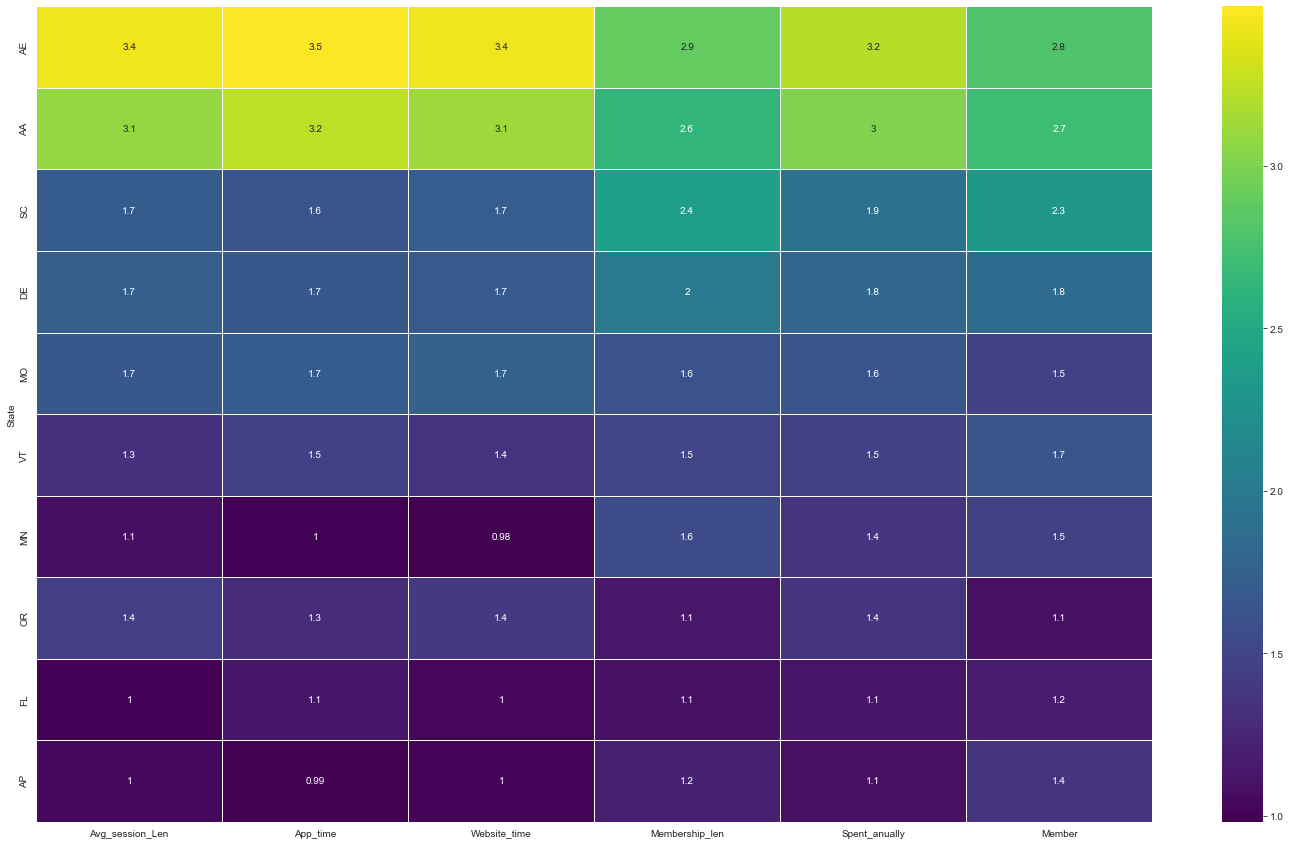

In [376]:
fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(heat,annot=True,linewidths=0.5,ax=ax,cmap='viridis')


#### from this we can deduce to spend more resources to these states as they tend to be our best customers
#### lets see our worst customer loyalty group so we can do more campaign to bring them to our site

In [377]:
df_comp.sort_values(by='Spent_anually',ascending=True).head(10)

#### clearly we can see that we need to do some work on these states to gravitate their population to our product and site

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Member
State,,,,,,
ID,-1.757933,-1.753563,-1.761953,-1.864026,-1.815735,-1.937291
WA,-1.404142,-1.354943,-1.407844,-1.282893,-1.296915,-1.275256
CO,-1.098081,-1.090959,-1.065401,-1.059254,-1.145430,-1.086103
PW,-0.759990,-0.678043,-0.704079,-1.370419,-1.065802,-1.369832
GU,-0.739248,-0.755978,-0.709470,-1.259079,-1.060073,-1.275256
CT,-1.085637,-1.119530,-1.102201,-0.773040,-1.038242,-0.802374
MD,-1.057009,-1.014703,-1.077777,-1.125086,-1.025192,-1.086103
TN,-1.087574,-1.060419,-1.062945,-0.739012,-0.970960,-0.707798
WI,-1.048037,-1.019964,-1.090208,-0.865796,-0.925550,-0.802374


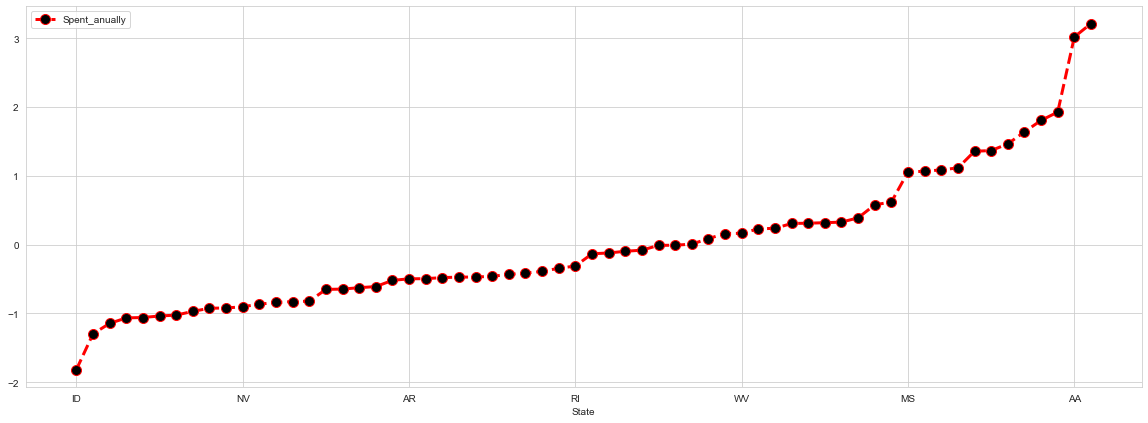

In [378]:
df_comp.sort_values(by='Spent_anually')['Spent_anually'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=10,linestyle='dashed',linewidth=3,color='red')


#### note this is from standardization, hence we see negative on y axis

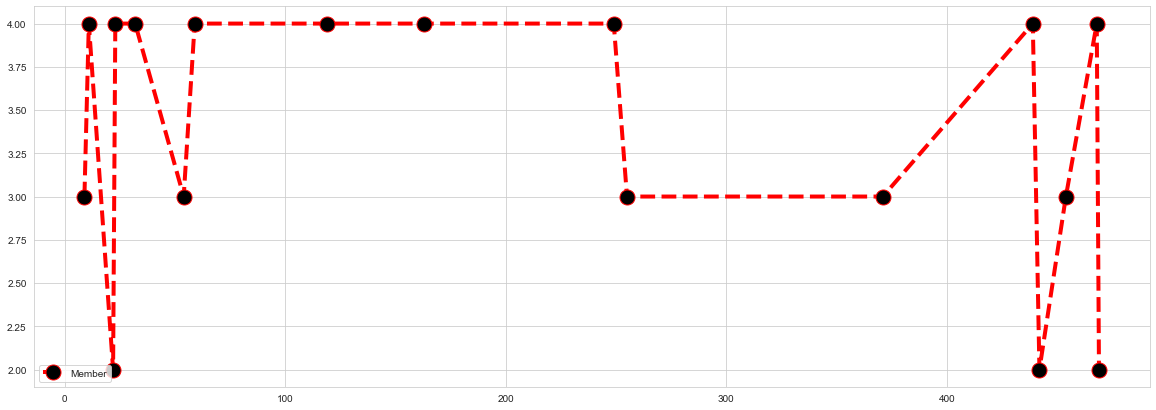

In [379]:
new_df[new_df.State=='AA']['Member'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=15,linestyle='dashed',linewidth=4,color='red')


#### because AA state is so strongly spending on our site we wanted to see their membership status, seems like most of them are 3+ years

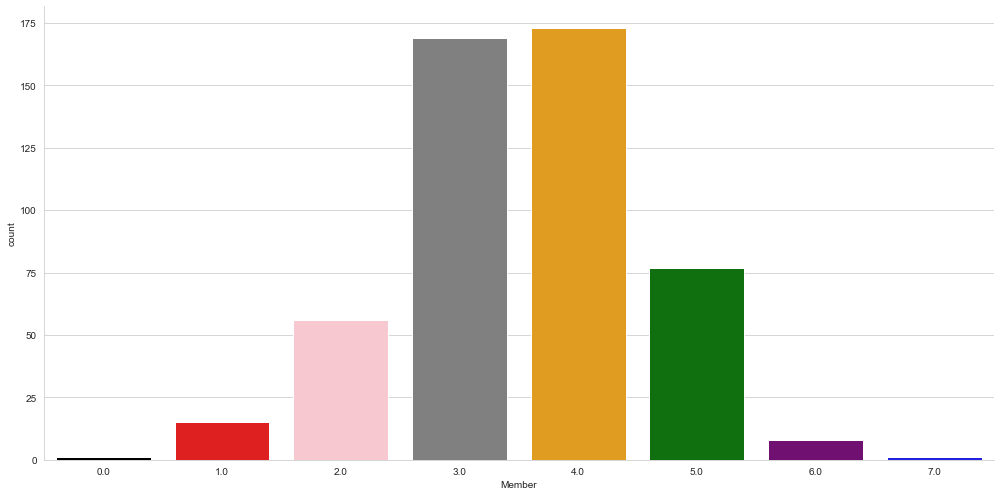

In [380]:
sns.catplot(x='Member',data=new_df,kind='count',height=7,aspect=2,palette=custom)


#### seems like 3-4 years members are the sweat spot for us

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


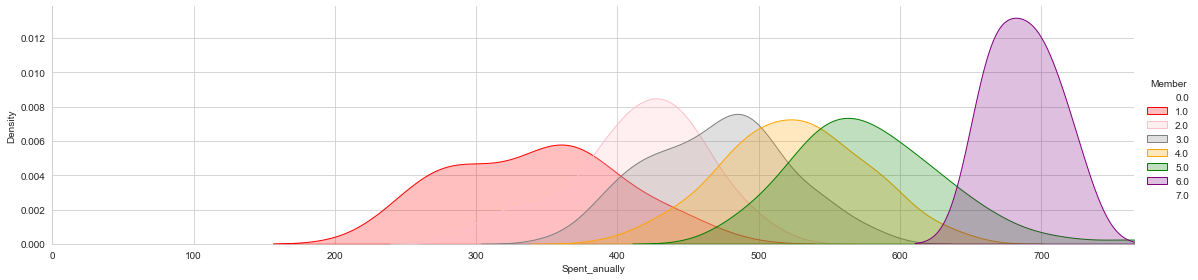

In [381]:
pl = sns.FacetGrid(new_df,hue='Member',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Spent_anually',fill=True)

pl.set(xlim=(0,new_df.Spent_anually.max()))

pl.add_legend()


#### lets take care of this error first

In [382]:
variance_check = new_df.groupby('Member')['Spent_anually'].var()


In [383]:
variance_check

Member
0.0            NaN
1.0    3313.925742
2.0    2221.133585
3.0    2461.268106
4.0    2564.621726
5.0    2894.314320
6.0     557.649954
7.0            NaN
Name: Spent_anually, dtype: float64

In [384]:
valid_members = variance_check[variance_check > 0].index
filtered_df = new_df[new_df['Member'].isin(valid_members)]

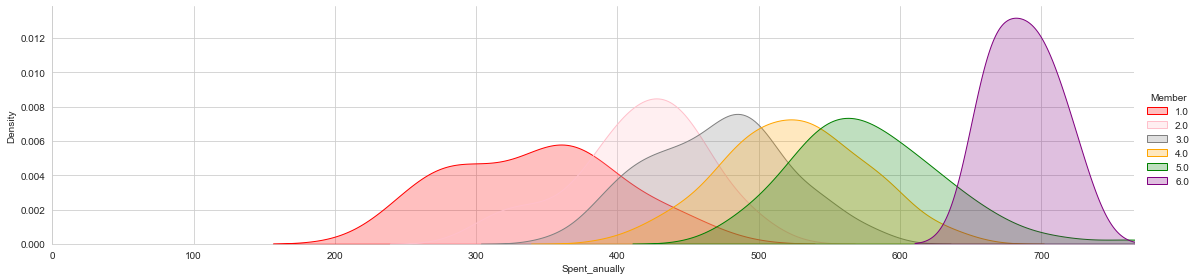

In [385]:
pl = sns.FacetGrid(filtered_df,hue='Member',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Spent_anually',fill=True)

pl.set(xlim=(0,new_df.Spent_anually.max()))

pl.add_legend()



In [386]:
new_df[new_df.Member==7]                #### been a member since 7 years

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
157,34.603311,12.207298,33.913847,6.922689,744.221867,yahoo.com,AP,7.0


In [387]:
new_df[new_df.Member==0]                #### new member but kde will have a hard time plotting this one so we took care with variance

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
447,32.904854,12.556108,37.805509,0.269901,314.438518,yahoo.com,MO,0.0


In [388]:
filtered_df.Member.unique()

array([4., 3., 5., 2., 6., 1.])

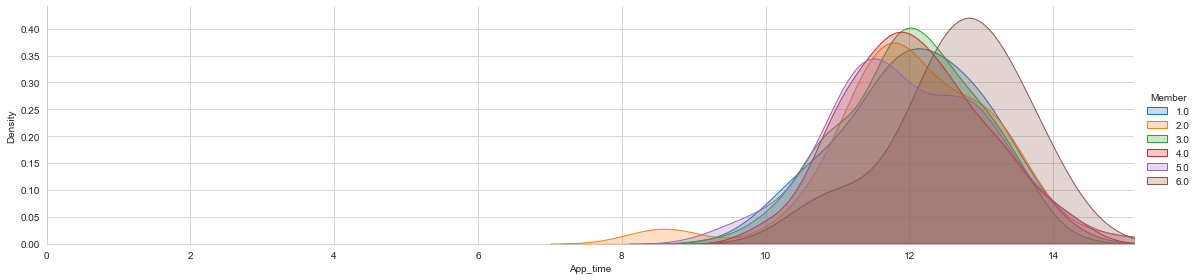

In [389]:
pl = sns.FacetGrid(filtered_df,hue='Member',aspect=4,height=4)

pl.map(sns.kdeplot,'App_time',fill=True)

pl.set(xlim=(0,filtered_df.App_time.max()))

pl.add_legend()


#### seems like the peak is around 12 for all members except for 6 years members

In [390]:
filtered_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,4.0
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,3.0
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,4.0
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,3.0
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,4.0


In [391]:
filtered_df.State.unique()

array(['MI', 'CA', 'DC', 'OH', 'PR', 'MN', 'WV', 'AP', 'SD', 'AA', 'WY',
       'MO', 'MP', 'ND', 'GA', 'PW', 'MT', 'KY', 'AE', 'VI', 'TX', 'MS',
       'SC', 'WA', 'NJ', 'NH', 'ME', 'ID', 'TN', 'AK', 'DE', 'FM', 'HI',
       'KS', 'NC', 'UT', 'AL', 'LA', 'NE', 'OR', 'CT', 'MA', 'IN', 'AZ',
       'MH', 'NY', 'CO', 'IA', 'GU', 'AS', 'RI', 'VA', 'MD', 'OK', 'WI',
       'VT', 'FL', 'IL', 'NV', 'PA', 'NM', 'AR'], dtype=object)

In [392]:
filtered_df['State_num'] = filtered_df.State.map({'MI':1,
                                                  'CA':2,
                                                  'DC':3,
                                                  'OH':4,
                                                  'PR':5,
                                                  'MN':6,
                                                  'WV':7,
                                                  'AP':8,
                                                  'SD':9,
                                                  'AA':10,
                                                  'WY':11,
                                                  'MO':12,
                                                  'MP':13,
                                                  'ND':14,
                                                  'GA':15,
                                                  'PW':16,
                                                  'MT':17,
                                                  'KY':18,
                                                  'AE':19,
                                                  'VI':20,
                                                  'TX':21,
                                                  'MS':22,
                                                  'SC':23,
                                                  'WA':24,
                                                  'NJ':25,
                                                  'NH':26,
                                                  'ME':27,
                                                  'ID':28,
                                                  'TN':29,
                                                  'AK':30,
                                                  'DE':31,
                                                  'FM':32,
                                                  'HI':33,
                                                  'KS':34,
                                                  'NC':35,
                                                  'UT':36,
                                                  'AL':37,
                                                  'LA':39,
                                                  'NE':40,
                                                  'OR':41,
                                                  'CT':42,
                                                  'MA':43,
                                                  'IN':44,
                                                  'AZ':45,
                                                  'MH':46,
                                                  'NY':47,
                                                  'CO':48,
                                                  'IA':49,
                                                  'GU':50,
                                                  'AS':51,
                                                  'RI':52,
                                                  'VA':53,
                                                  'MD':54,
                                                  'OK':55,
                                                  'WI':56,
                                                  'VT':57,
                                                  'FL':58,
                                                  'IL':59,
                                                  'NV':60,
                                                  'PA':61,
                                                  'NM':62,
                                                  'AR':63})

#### dont worry about the warning, we should have gone with a copy to prevent this but at this point lets just continue

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [393]:
filtered_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member,State_num
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,4.0,1
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,3.0,2
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,4.0,3
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,3.0,4
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,4.0,5


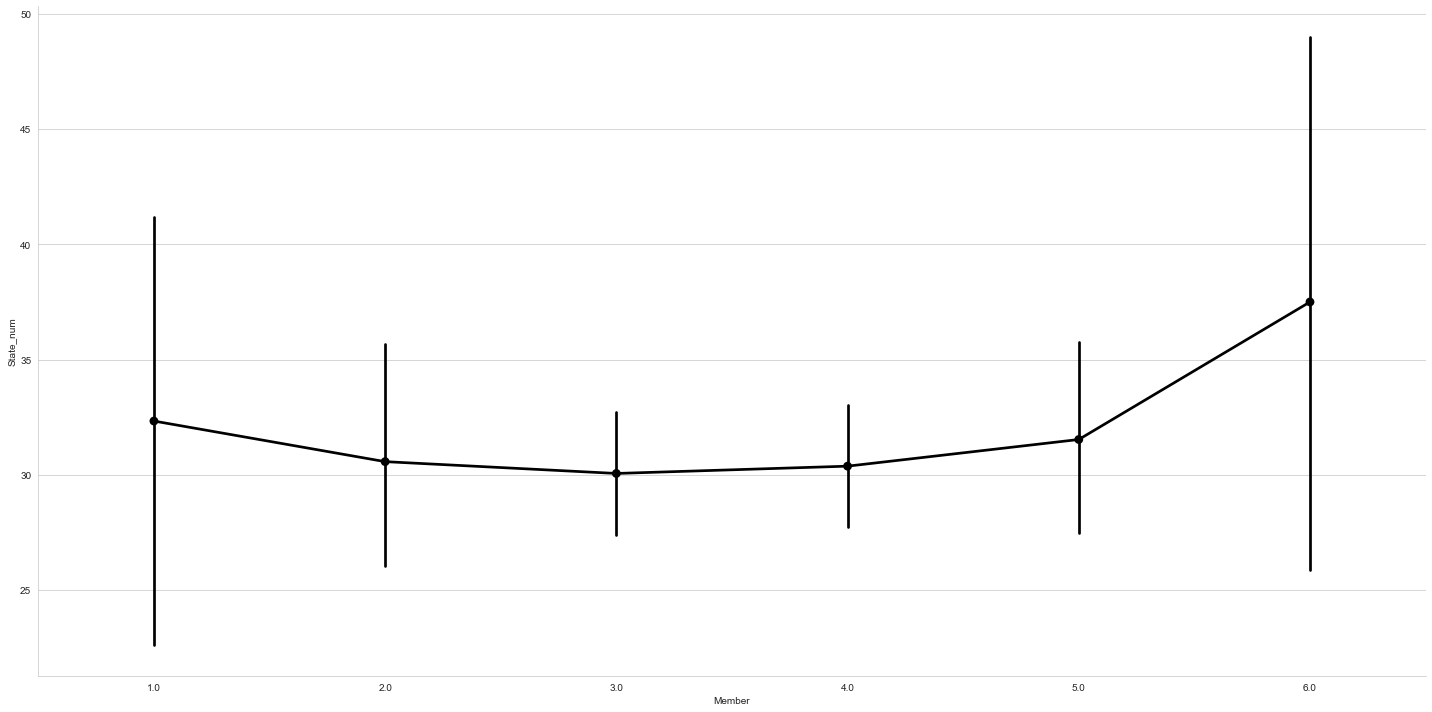

In [394]:
pl = sns.catplot(y='State_num',x='Member',data=filtered_df,kind='point',height=10,aspect=2,color='black')


#### this is very interesting plot, from here we see that most of the members are 1 year long member and 6 years long members from different states

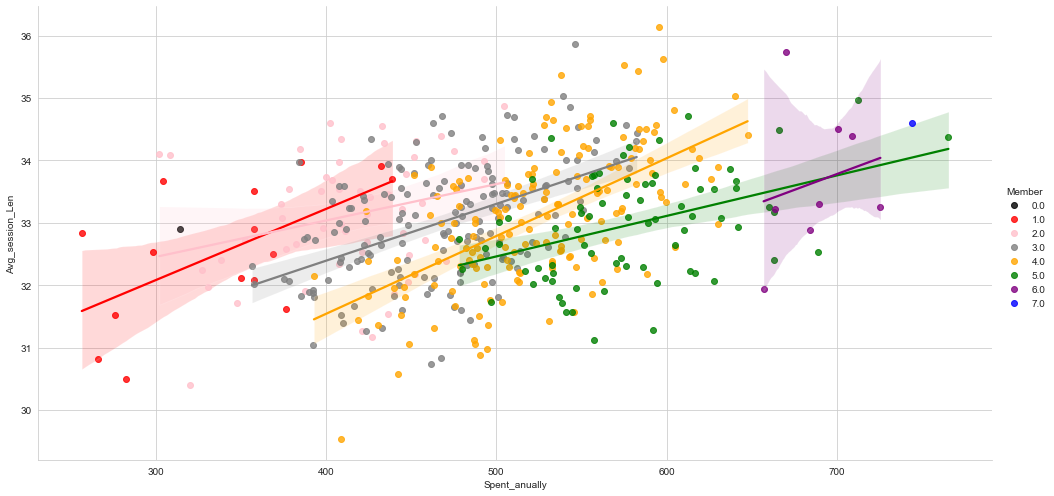

In [395]:
pl = sns.lmplot(x='Spent_anually',y='Avg_session_Len',data=new_df,hue='Member',height=7,aspect=2,palette=custom)


#### quite interesing plot, we can clearly see linear relationship between different memberships
#### the strongest ones being red and orange

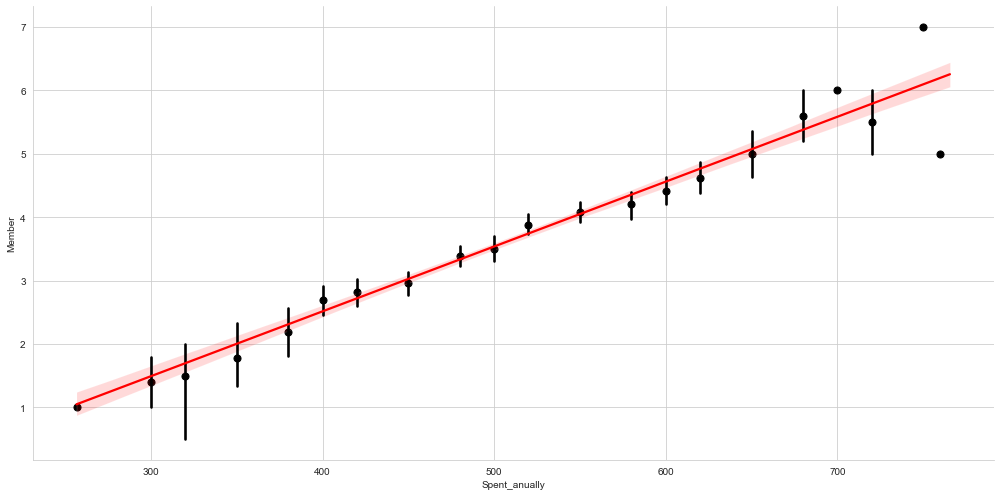

In [396]:
sns.lmplot(x='Spent_anually',y='Member',data=new_df,x_bins=[257,300,320,350,380,400,420,450,480,500,520,550,580,600,620,650,680,700,720,750,760],height=7,aspect=2,line_kws={'color':'red'},scatter_kws={'color':'black'})


#### this is just amazing, like a really good proper linear correlation. sorry I get excited seeing this strong relationship. we love stats here a lot

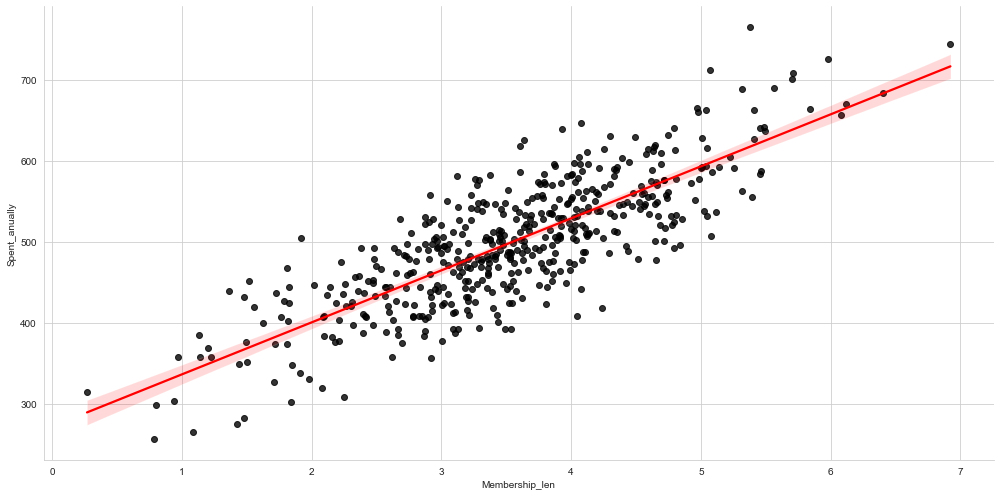

In [397]:
sns.lmplot(x='Membership_len',y='Spent_anually',data=new_df,height=7,aspect=2,line_kws={'color':'red'},scatter_kws={'color':'black'})


#### just amazing amazing linear relationship between spending and membership length, just love seeing this honestly

In [398]:
new_df.Spent_anually.std()

79.31478154970677

In [399]:
new_df.Spent_anually.mean()

499.314038258591

In [400]:
mean_df = new_df.Spent_anually.mean()

std_df = new_df.Spent_anually.std()

In [401]:
from scipy.stats import norm


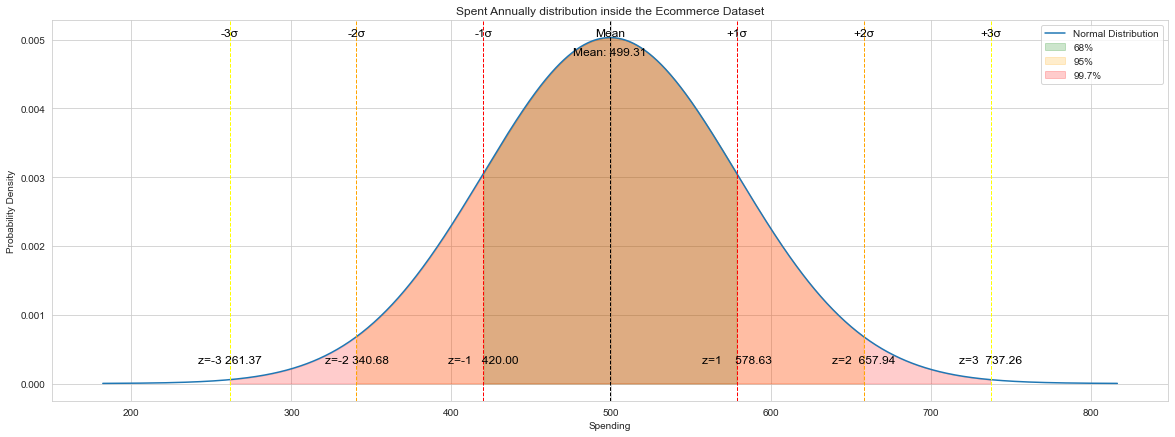

In [405]:

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='orange', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='red', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Spent Annually distribution inside the Ecommerce Dataset')
plt.xlabel('Spending')
plt.ylabel('Probability Density')

plt.legend()



#### note this is very infomative as we see the majority of spending is between 420-578 with the peak being 499
#### then we move to z-score 2 where the density decreases on both side on z scores and then same happens with z-score level 3 on both sides

In [406]:
#######################################################################################
############## PART VI - Model - Linear Regression
#######################################################################################


In [407]:
X = new_df.drop(columns=['Spent_anually','Membership_len'])

X.head()

,Avg_session_Len,App_time,Website_time,Domain,State,Member
0,34.497268,12.655651,39.577668,fernandez.com,MI,4.0
1,31.926272,11.109461,37.268959,hotmail.com,CA,3.0
2,33.000915,11.330278,37.110597,yahoo.com,DC,4.0
3,34.305557,13.717514,36.721283,gmail.com,OH,3.0
4,33.330673,12.795189,37.536653,davidson-herman.com,PR,4.0


In [408]:
y = new_df['Spent_anually']

y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Spent_anually, dtype: float64

In [409]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [410]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Domain','State']),
                                               ('num', StandardScaler(),['Avg_session_Len','App_time','Website_time','Member'])
                                              ]
                                )



In [411]:
from sklearn.pipeline import Pipeline

In [412]:
from sklearn.linear_model import LinearRegression

In [413]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())
                       ])

In [414]:
from sklearn.model_selection import train_test_split


In [415]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [416]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Domain', 'State']),
                                                 ('num', StandardScaler(),
                                                  ['Avg_session_Len',
                                                   'App_time', 'Website_time',
                                                   'Member'])])),
                ('regressor', LinearRegression())])

In [417]:
y_predict = model.predict(X_test)

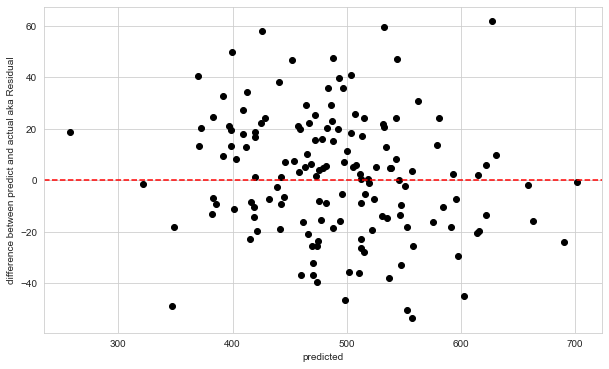

In [418]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


#### seems like a perfect model from the plot, this is how it should be without any pattern formation


In [419]:
from sklearn import metrics

In [420]:
metrics.r2_score(y_test,y_predict)                #### amazing

0.8962899519021164

In [421]:
metrics.mean_squared_error(y_test,y_predict) 

563.5302689493352

In [422]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### seems like we are off by 23 

23.738792491391283

In [423]:
from sklearn.model_selection import GridSearchCV                   #### lets see if we can further improve it

In [424]:
from sklearn.ensemble import RandomForestRegressor

In [425]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [426]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [427]:
%%time

grid_model = GridSearchCV(model, param_grid, cv=5, scoring='r2',verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.7s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.5s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.9s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.8s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   1.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   1.7s
[CV] END regressor__max_depth=None, regressor__min_sampl

[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   1.5s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estima

[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.0s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.0s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estima

[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.9s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=30

[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.5s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.6s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; tota

[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   1.8s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=300; total time=   1.9s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; tota

[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.5s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=300; total time=   1.3s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=100; to

[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.6s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   0.6s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=300; total time=   1.0s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=300; total time=   1.2s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=300; total time=   1.0s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=30

In [428]:
best_model = grid_model.best_estimator_


In [429]:
y_predict = best_model.predict(X_test)

In [430]:
metrics.r2_score(y_test,y_predict)            #### seems some improvement

0.9120591458376979

In [431]:
metrics.mean_squared_error(y_test,y_predict)

477.84505076058963

In [432]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_predict))

rmse                          #### now we are off my 21.8

21.859667215229734

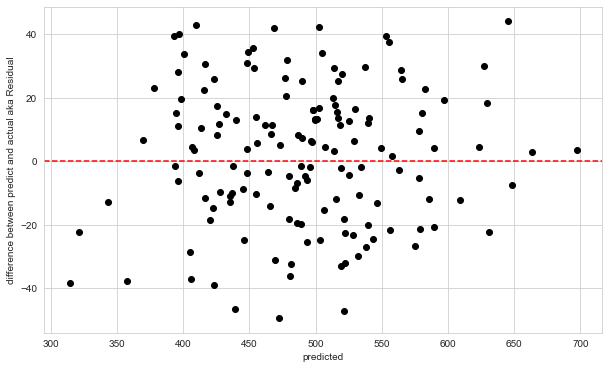

In [433]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


#### better

In [434]:
from xgboost import XGBRegressor

In [435]:
from sklearn.model_selection import RandomizedSearchCV

In [436]:
from scipy.stats import randint

In [437]:
from scipy.stats import uniform

In [438]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [439]:
param_grid = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 10),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

In [440]:
random_model = RandomizedSearchCV(model, param_grid, cv=5, scoring='r2', n_iter=100, random_state=42,verbose=2)

In [441]:
%%time

random_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=800, regressor__subsample=0.7984250789732434; total time=   2.5s
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=800, regressor__subsample=0.7984250789732434; total time=   2.1s
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=800, regressor__subsample=0.7984250789732434; total time=   2.5s
[CV] END regressor__colsample_bytree=0.6872700594236812, regressor__learning_rate=0.2952142919229748, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=800, regressor__su

[CV] END regressor__colsample_bytree=0.5066324805799333, regressor__learning_rate=0.29266052670545584, regressor__max_depth=8, regressor__min_child_weight=2, regressor__n_estimators=876, regressor__subsample=0.5079831261101071; total time=   2.4s
[CV] END regressor__colsample_bytree=0.5066324805799333, regressor__learning_rate=0.29266052670545584, regressor__max_depth=8, regressor__min_child_weight=2, regressor__n_estimators=876, regressor__subsample=0.5079831261101071; total time=   2.5s
[CV] END regressor__colsample_bytree=0.6154469128110744, regressor__learning_rate=0.0823076398078035, regressor__max_depth=6, regressor__min_child_weight=7, regressor__n_estimators=527, regressor__subsample=0.7475884550556351; total time=   1.6s
[CV] END regressor__colsample_bytree=0.6154469128110744, regressor__learning_rate=0.0823076398078035, regressor__max_depth=6, regressor__min_child_weight=7, regressor__n_estimators=527, regressor__subsample=0.7475884550556351; total time=   1.5s
[CV] END regre

[CV] END regressor__colsample_bytree=0.7713480415791243, regressor__learning_rate=0.052277267492428794, regressor__max_depth=9, regressor__min_child_weight=1, regressor__n_estimators=956, regressor__subsample=0.9934434683002586; total time=   3.6s
[CV] END regressor__colsample_bytree=0.7713480415791243, regressor__learning_rate=0.052277267492428794, regressor__max_depth=9, regressor__min_child_weight=1, regressor__n_estimators=956, regressor__subsample=0.9934434683002586; total time=   3.5s
[CV] END regressor__colsample_bytree=0.7713480415791243, regressor__learning_rate=0.052277267492428794, regressor__max_depth=9, regressor__min_child_weight=1, regressor__n_estimators=956, regressor__subsample=0.9934434683002586; total time=   3.6s
[CV] END regressor__colsample_bytree=0.8861223846483287, regressor__learning_rate=0.06961470446025171, regressor__max_depth=9, regressor__min_child_weight=3, regressor__n_estimators=692, regressor__subsample=0.855670976374325; total time=   2.6s
[CV] END r

[CV] END regressor__colsample_bytree=0.7376851115910559, regressor__learning_rate=0.17898267159291512, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=506, regressor__subsample=0.8022086896389087; total time=   1.6s
[CV] END regressor__colsample_bytree=0.7376851115910559, regressor__learning_rate=0.17898267159291512, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=506, regressor__subsample=0.8022086896389087; total time=   1.5s
[CV] END regressor__colsample_bytree=0.7376851115910559, regressor__learning_rate=0.17898267159291512, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=506, regressor__subsample=0.8022086896389087; total time=   1.5s
[CV] END regressor__colsample_bytree=0.7376851115910559, regressor__learning_rate=0.17898267159291512, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=506, regressor__subsample=0.8022086896389087; total time=   1.4s
[CV] END reg

[CV] END regressor__colsample_bytree=0.8515094794475889, regressor__learning_rate=0.11908888071378819, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=367, regressor__subsample=0.6258911479126821; total time=   0.9s
[CV] END regressor__colsample_bytree=0.8515094794475889, regressor__learning_rate=0.11908888071378819, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=367, regressor__subsample=0.6258911479126821; total time=   1.1s
[CV] END regressor__colsample_bytree=0.8515094794475889, regressor__learning_rate=0.11908888071378819, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=367, regressor__subsample=0.6258911479126821; total time=   1.0s
[CV] END regressor__colsample_bytree=0.8515094794475889, regressor__learning_rate=0.11908888071378819, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=367, regressor__subsample=0.6258911479126821; total time=   1.2s
[CV] END reg

[CV] END regressor__colsample_bytree=0.5932592551999272, regressor__learning_rate=0.022232542466429174, regressor__max_depth=6, regressor__min_child_weight=4, regressor__n_estimators=502, regressor__subsample=0.855574766219009; total time=   1.5s
[CV] END regressor__colsample_bytree=0.9047505230698577, regressor__learning_rate=0.11459979618751881, regressor__max_depth=9, regressor__min_child_weight=4, regressor__n_estimators=588, regressor__subsample=0.845468869051233; total time=   2.2s
[CV] END regressor__colsample_bytree=0.9047505230698577, regressor__learning_rate=0.11459979618751881, regressor__max_depth=9, regressor__min_child_weight=4, regressor__n_estimators=588, regressor__subsample=0.845468869051233; total time=   2.2s
[CV] END regressor__colsample_bytree=0.9047505230698577, regressor__learning_rate=0.11459979618751881, regressor__max_depth=9, regressor__min_child_weight=4, regressor__n_estimators=588, regressor__subsample=0.845468869051233; total time=   2.1s
[CV] END regres

[CV] END regressor__colsample_bytree=0.803214529829795, regressor__learning_rate=0.012759115484988894, regressor__max_depth=8, regressor__min_child_weight=9, regressor__n_estimators=198, regressor__subsample=0.9868319183776586; total time=   0.6s
[CV] END regressor__colsample_bytree=0.803214529829795, regressor__learning_rate=0.012759115484988894, regressor__max_depth=8, regressor__min_child_weight=9, regressor__n_estimators=198, regressor__subsample=0.9868319183776586; total time=   0.5s
[CV] END regressor__colsample_bytree=0.6419604873687328, regressor__learning_rate=0.10160915810331803, regressor__max_depth=4, regressor__min_child_weight=6, regressor__n_estimators=262, regressor__subsample=0.8259806297513003; total time=   0.7s
[CV] END regressor__colsample_bytree=0.6419604873687328, regressor__learning_rate=0.10160915810331803, regressor__max_depth=4, regressor__min_child_weight=6, regressor__n_estimators=262, regressor__subsample=0.8259806297513003; total time=   0.7s
[CV] END reg

[CV] END regressor__colsample_bytree=0.822736147953584, regressor__learning_rate=0.06313320382211468, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=617, regressor__subsample=0.6850793501277221; total time=   1.0s
[CV] END regressor__colsample_bytree=0.822736147953584, regressor__learning_rate=0.06313320382211468, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=617, regressor__subsample=0.6850793501277221; total time=   1.2s
[CV] END regressor__colsample_bytree=0.822736147953584, regressor__learning_rate=0.06313320382211468, regressor__max_depth=6, regressor__min_child_weight=5, regressor__n_estimators=617, regressor__subsample=0.6850793501277221; total time=   1.1s
[CV] END regressor__colsample_bytree=0.5077283082644337, regressor__learning_rate=0.2884955687763176, regressor__max_depth=3, regressor__min_child_weight=5, regressor__n_estimators=706, regressor__subsample=0.9818099885446264; total time=   1.0s
[CV] END regress

[CV] END regressor__colsample_bytree=0.9566202762782356, regressor__learning_rate=0.16340271965828135, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=784, regressor__subsample=0.5971369767560211; total time=   1.2s
[CV] END regressor__colsample_bytree=0.9566202762782356, regressor__learning_rate=0.16340271965828135, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=784, regressor__subsample=0.5971369767560211; total time=   1.2s
[CV] END regressor__colsample_bytree=0.9566202762782356, regressor__learning_rate=0.16340271965828135, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=784, regressor__subsample=0.5971369767560211; total time=   1.2s
[CV] END regressor__colsample_bytree=0.9566202762782356, regressor__learning_rate=0.16340271965828135, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=784, regressor__subsample=0.5971369767560211; total time=   1.2s
[CV] END reg

[CV] END regressor__colsample_bytree=0.5205337583839379, regressor__learning_rate=0.12964627043343835, regressor__max_depth=5, regressor__min_child_weight=7, regressor__n_estimators=445, regressor__subsample=0.5126753717077288; total time=   0.6s
[CV] END regressor__colsample_bytree=0.5205337583839379, regressor__learning_rate=0.12964627043343835, regressor__max_depth=5, regressor__min_child_weight=7, regressor__n_estimators=445, regressor__subsample=0.5126753717077288; total time=   0.7s
[CV] END regressor__colsample_bytree=0.5205337583839379, regressor__learning_rate=0.12964627043343835, regressor__max_depth=5, regressor__min_child_weight=7, regressor__n_estimators=445, regressor__subsample=0.5126753717077288; total time=   0.7s
[CV] END regressor__colsample_bytree=0.5205337583839379, regressor__learning_rate=0.12964627043343835, regressor__max_depth=5, regressor__min_child_weight=7, regressor__n_estimators=445, regressor__subsample=0.5126753717077288; total time=   0.7s
[CV] END reg

[CV] END regressor__colsample_bytree=0.5489170803255008, regressor__learning_rate=0.1574847625350497, regressor__max_depth=9, regressor__min_child_weight=4, regressor__n_estimators=388, regressor__subsample=0.7323369064698058; total time=   0.7s
[CV] END regressor__colsample_bytree=0.8248868413213817, regressor__learning_rate=0.024417677259110118, regressor__max_depth=8, regressor__min_child_weight=5, regressor__n_estimators=199, regressor__subsample=0.5226520048860223; total time=   0.3s
[CV] END regressor__colsample_bytree=0.8248868413213817, regressor__learning_rate=0.024417677259110118, regressor__max_depth=8, regressor__min_child_weight=5, regressor__n_estimators=199, regressor__subsample=0.5226520048860223; total time=   0.3s
[CV] END regressor__colsample_bytree=0.8248868413213817, regressor__learning_rate=0.024417677259110118, regressor__max_depth=8, regressor__min_child_weight=5, regressor__n_estimators=199, regressor__subsample=0.5226520048860223; total time=   0.3s
[CV] END r

[CV] END regressor__colsample_bytree=0.5590824138108281, regressor__learning_rate=0.2190211496092452, regressor__max_depth=7, regressor__min_child_weight=8, regressor__n_estimators=519, regressor__subsample=0.7089730158577894; total time=   0.9s
[CV] END regressor__colsample_bytree=0.5590824138108281, regressor__learning_rate=0.2190211496092452, regressor__max_depth=7, regressor__min_child_weight=8, regressor__n_estimators=519, regressor__subsample=0.7089730158577894; total time=   0.9s
[CV] END regressor__colsample_bytree=0.9837902757601238, regressor__learning_rate=0.1743915649744262, regressor__max_depth=7, regressor__min_child_weight=9, regressor__n_estimators=291, regressor__subsample=0.7879622876290423; total time=   0.5s
[CV] END regressor__colsample_bytree=0.9837902757601238, regressor__learning_rate=0.1743915649744262, regressor__max_depth=7, regressor__min_child_weight=9, regressor__n_estimators=291, regressor__subsample=0.7879622876290423; total time=   0.5s
[CV] END regress

[CV] END regressor__colsample_bytree=0.7242227609891598, regressor__learning_rate=0.09796323150941935, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=990, regressor__subsample=0.6063639475121145; total time=   1.4s
[CV] END regressor__colsample_bytree=0.7242227609891598, regressor__learning_rate=0.09796323150941935, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=990, regressor__subsample=0.6063639475121145; total time=   1.4s
[CV] END regressor__colsample_bytree=0.7242227609891598, regressor__learning_rate=0.09796323150941935, regressor__max_depth=3, regressor__min_child_weight=4, regressor__n_estimators=990, regressor__subsample=0.6063639475121145; total time=   1.5s
[CV] END regressor__colsample_bytree=0.9730972714408451, regressor__learning_rate=0.24438881514136077, regressor__max_depth=9, regressor__min_child_weight=5, regressor__n_estimators=141, regressor__subsample=0.9871241042672051; total time=   0.3s
[CV] END reg

[CV] END regressor__colsample_bytree=0.6881297927654579, regressor__learning_rate=0.03505021500960063, regressor__max_depth=7, regressor__min_child_weight=6, regressor__n_estimators=266, regressor__subsample=0.7121110046234882; total time=   0.4s
[CV] END regressor__colsample_bytree=0.6881297927654579, regressor__learning_rate=0.03505021500960063, regressor__max_depth=7, regressor__min_child_weight=6, regressor__n_estimators=266, regressor__subsample=0.7121110046234882; total time=   0.4s
[CV] END regressor__colsample_bytree=0.6881297927654579, regressor__learning_rate=0.03505021500960063, regressor__max_depth=7, regressor__min_child_weight=6, regressor__n_estimators=266, regressor__subsample=0.7121110046234882; total time=   0.4s
[CV] END regressor__colsample_bytree=0.6881297927654579, regressor__learning_rate=0.03505021500960063, regressor__max_depth=7, regressor__min_child_weight=6, regressor__n_estimators=266, regressor__subsample=0.7121110046234882; total time=   0.4s
[CV] END reg

[CV] END regressor__colsample_bytree=0.69210091568961, regressor__learning_rate=0.23113021175290577, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=457, regressor__subsample=0.7278283763928565; total time=   0.7s
[CV] END regressor__colsample_bytree=0.69210091568961, regressor__learning_rate=0.23113021175290577, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=457, regressor__subsample=0.7278283763928565; total time=   0.7s
[CV] END regressor__colsample_bytree=0.69210091568961, regressor__learning_rate=0.23113021175290577, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=457, regressor__subsample=0.7278283763928565; total time=   0.7s
[CV] END regressor__colsample_bytree=0.69210091568961, regressor__learning_rate=0.23113021175290577, regressor__max_depth=5, regressor__min_child_weight=8, regressor__n_estimators=457, regressor__subsample=0.7278283763928565; total time=   0.7s
[CV] END regressor__

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Domain',
                                                                                'State']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['Avg_session_Len',
                                                                                'App_time',
                                                                                'Website_time',
                                                         

In [442]:
best_model = random_model.best_estimator_

In [443]:
y_predict = best_model.predict(X_test)

In [444]:
metrics.mean_squared_error(y_test,y_predict)

396.38763421256107

In [445]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))         #### again some improvement went from 21.8 to 19.9 

19.90948603587147

In [446]:
metrics.r2_score(y_test,y_predict)

0.9270502706336667

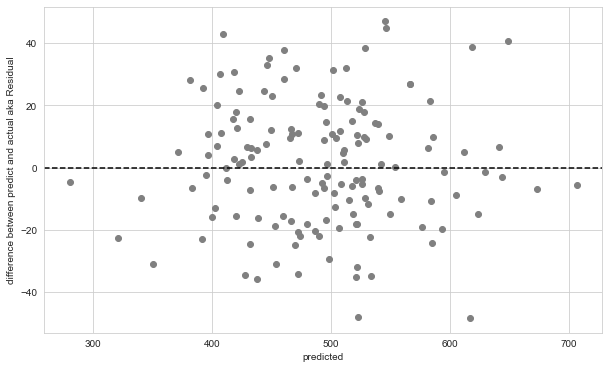

In [447]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='grey')

plt.axhline(0,color = 'black',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just beautiful and well fit model, usually this method is used to see if the model is better fit for the data set and yes it is

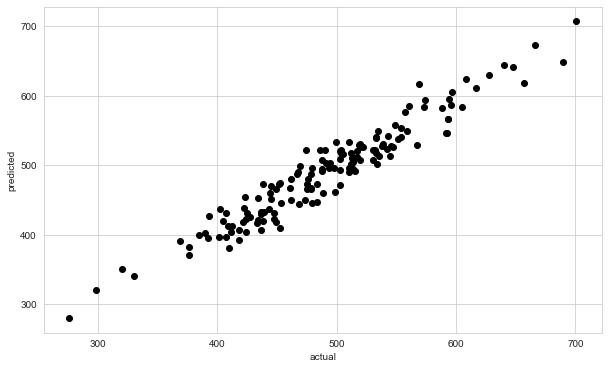

In [448]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict,color='black')

plt.xlabel('actual')

plt.ylabel('predicted')


#### see even without a linear line we can see a pattern and how well they are, this is just beauty

In [449]:
#### we are going back to the training because I think we can improve by excluding 2 feature columns which is not highly correlated

new_df.head()

,Avg_session_Len,App_time,Website_time,Membership_len,Spent_anually,Domain,State,Member
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,4.0
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,3.0
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,4.0
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,3.0
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,4.0


In [450]:
X = new_df.drop(columns=['Spent_anually','Domain','State','Membership_len'])

X.head()

,Avg_session_Len,App_time,Website_time,Member
0,34.497268,12.655651,39.577668,4.0
1,31.926272,11.109461,37.268959,3.0
2,33.000915,11.330278,37.110597,4.0
3,34.305557,13.717514,36.721283,3.0
4,33.330673,12.795189,37.536653,4.0


In [451]:
y = new_df['Spent_anually']

y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Spent_anually, dtype: float64

In [452]:
preprocessor = ColumnTransformer(transformers=[
                                               ('num', StandardScaler(),['Avg_session_Len','App_time','Website_time','Member'])
                                              ]
                                )



In [453]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())
                       ])

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [455]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Avg_session_Len',
                                                   'App_time', 'Website_time',
                                                   'Member'])])),
                ('regressor', LinearRegression())])

In [456]:
y_predict = model.predict(X_test)

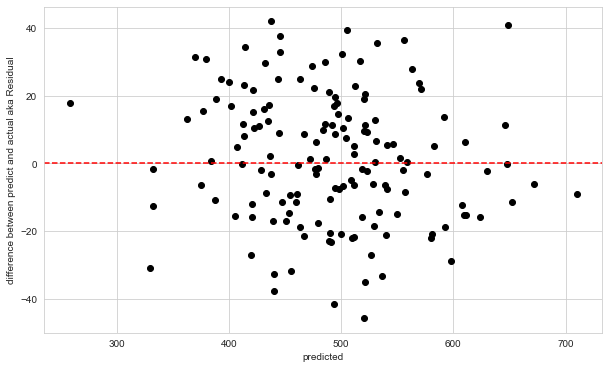

In [457]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


#### seems like a perfect model from the plot, this is how it should be


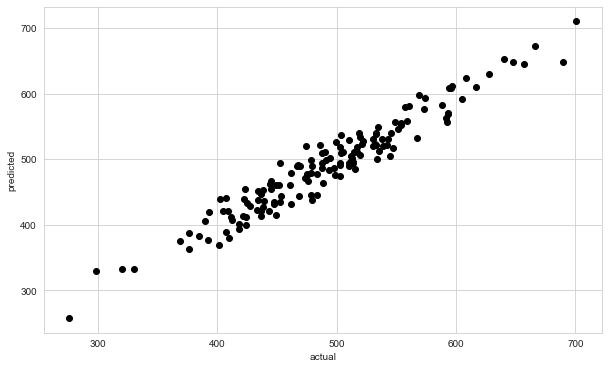

In [458]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict,color='black')

plt.xlabel('actual')

plt.ylabel('predicted')


#### good one

In [459]:
metrics.r2_score(y_test,y_predict)

0.9325731714526233

In [460]:
metrics.mean_squared_error(y_test,y_predict)

366.3777958124324

In [461]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))        #### see even with very basic linear model, we are surpassing what we did with advanced methods

19.140997774735578

In [462]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [463]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [464]:
%%time

grid_model = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_model.fit(X_train, y_train)

Wall time: 2min 8s


In [465]:
best_model = grid_model.best_estimator_


In [466]:
y_predict = best_model.predict(X_test)

In [467]:
metrics.r2_score(y_test,y_predict)

0.9096373654111798

In [468]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))         #### made it worse

22.158616878374737

In [469]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [470]:
param_grid = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 10),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

In [471]:
random_model = RandomizedSearchCV(model, param_grid, cv=5, scoring='r2', n_iter=100, random_state=42)

In [472]:
%%time

random_model.fit(X_train, y_train)

Wall time: 7min 42s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Avg_session_Len',
                                                                                'App_time',
                                                                                'Website_time',
                                                                                'Member'])])),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsam

In [473]:
best_model = random_model.best_estimator_

In [474]:
y_predict = best_model.predict(X_test)

In [475]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

20.31971912068907

In [476]:
metrics.r2_score(y_test,y_predict)                     #### not the improvement we were hoping for but its alright

0.9240130543328717

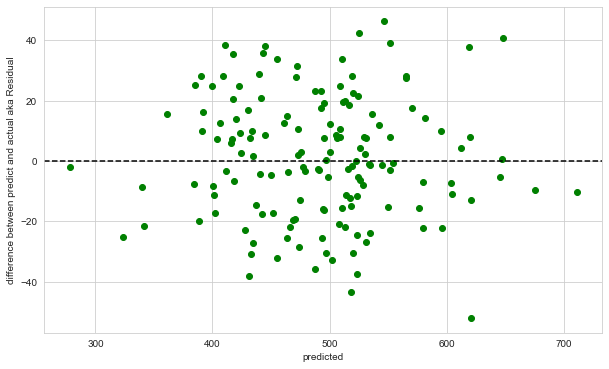

In [477]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='green')

plt.axhline(0,color = 'black',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')



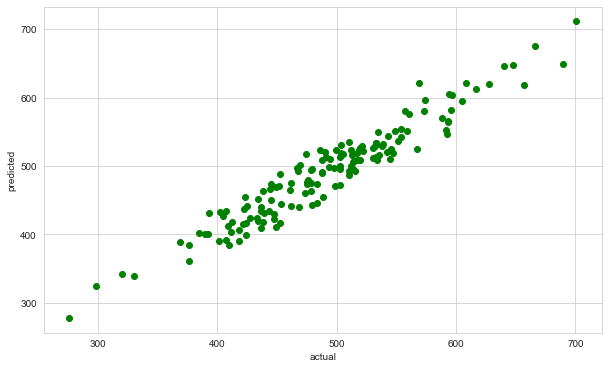

In [478]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict,color='green')

plt.xlabel('actual')

plt.ylabel('predicted')



In [479]:
################################################################################################################
#### We conducted an extensive analysis of an Ecommerce dataset to predict annual customer spending. ###########
#### Through thorough Exploratory Data Analysis (EDA) and Feature Engineering (FE), we developed various #######
#### regression models. Our best-performing model achieved a Root Mean Squared Error (RMSE) of 19.9 and a ######
#### coefficient of determination (R²) of 0.92. Additionally, a Random Forest Regression model yielded an ######
#### RMSE of 21.8, showcasing its robustness as a predictive tool. #############################################
################################################################################################################

